In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [5]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/full_manager_test6/map.csv")
cha_df = pd.read_csv("../measurements/full_manager_test6/characteristic.csv")
mag_df = pd.read_csv("../measurements/full_manager_test6/manager.csv")
# static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
# static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [6]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,mAP_drop,frame_id,feasible,sensitivity,map
0,0.00,100,1,18211756.5,0.5,1,-1,0.5,0.500000
1,0.15,2,2,18211756.5,0.5,2,-1,1.0,0.666667
2,0.20,4,3,21391587.0,0.5,3,-1,1.0,0.500000
3,0.10,80,1,21391587.0,0.5,4,-1,0.8,0.625000
4,0.20,90,1,21391587.0,0.5,5,-1,0.6,0.583333


In [7]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level

# Configuration

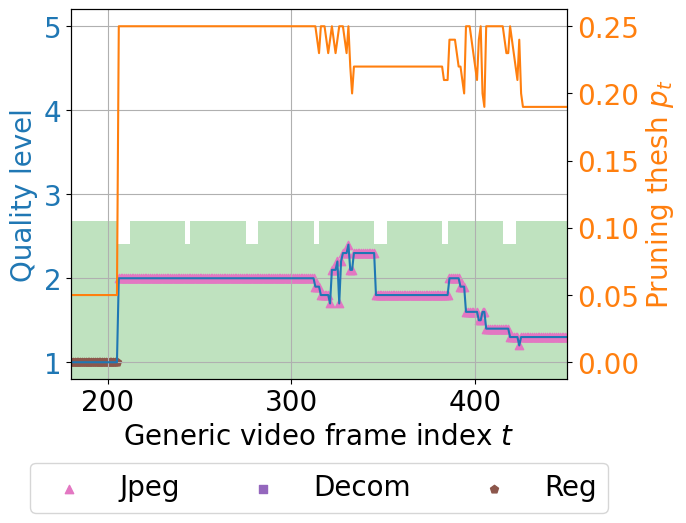

In [10]:
# fig, ax1 = plt.subplots(figsize=(6,4))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'Quality level', color=color)

ax1.tick_params(axis='y', labelcolor=color)

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        ax1.axvspan(i, i+1,0, (map_df["bandwidth"][i]/1e7)/5, facecolor='tab:green', alpha=0.3)
    else:
        ax1.axvspan(i, i+1,0, (map_df["bandwidth"][i]/1e7)/5, facecolor='tab:pink', alpha=0.3)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality_level"].to_numpy(),color=color)
_jpeg_df = map_df[map_df["technique"] == 1]
ax1.scatter(_jpeg_df["frame_id"].to_numpy(),_jpeg_df["quality_level"].to_numpy(),color="tab:pink",marker="^", label="Jpeg")
_decom_df = map_df[map_df["technique"] == 2]
ax1.scatter(_decom_df["frame_id"].to_numpy(),_decom_df["quality_level"].to_numpy(),color="tab:purple",marker="s", label="Decom")
_reg_df = map_df[map_df["technique"] == 3]
ax1.scatter(_reg_df["frame_id"].to_numpy(),_reg_df["quality_level"].to_numpy(),color="tab:brown",marker="p",label="Reg")
ax1.grid()
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Pruning thesh $p_t$', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.grid()
ax1.set_xlim([180, 450])
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4))
# ax1.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_config.pdf", bbox_inches='tight')
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

Text(0, 0.5, 'mAP drop $D^{mAP}_t$ [%]')

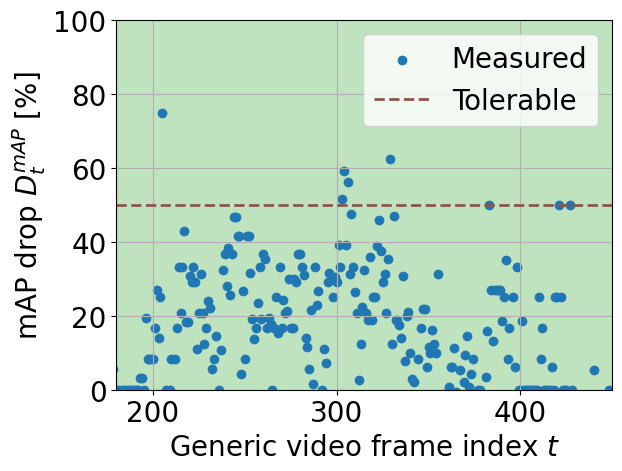

In [9]:

plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


# plt.scatter(static_map_df["frame_id"].to_numpy(),(local_df["map"].to_numpy() - static_map_df["map"].to_numpy())*100,label="Static")
drops = (local_df["map"].to_numpy() - map_df["map"].to_numpy())*100
# for i in range(150):
#     index = i+300
#     if drops[index]>25 and drops[index]<40:
#         drops[index] =25
plt.scatter(map_df["frame_id"].to_numpy(),drops,label="Measured")
plt.axhline(y=50, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([0,100])
plt.xlim([180, 450])
plt.legend()
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("mAP drop $D^{mAP}_t$ [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_map_drop.pdf", bbox_inches='tight')

In [10]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

Text(0, 0.5, 'Sensitivity drop $D_t^{sen}$ [%]')

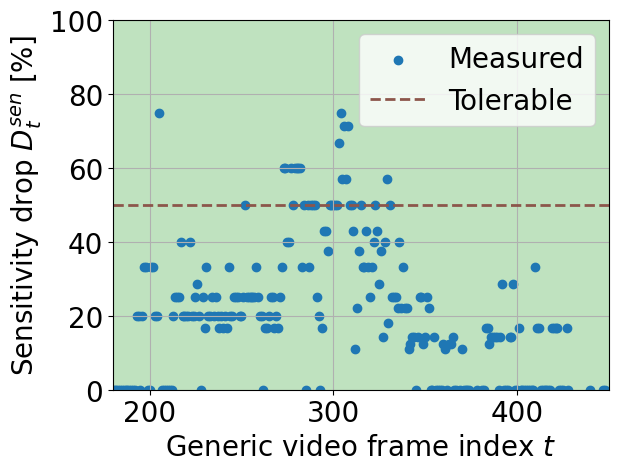

In [11]:
plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


# plt.scatter(static_map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy())*100,label="Static")
plt.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy())*100,label="Measured")
plt.axhline(y=50, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([0,100])
plt.xlim([180,450])
plt.legend()
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Sensitivity drop $D_t^{sen}$ [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_sensitivity_drop.pdf", bbox_inches='tight')

In [12]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [13]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,mAP_drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.00,100,1,18211756.5,0.5,1,0.000000,-1,-1,-1,4.513719,76680,77424,24.558444,-1.0,-1.0,-1.0
1,0.15,2,2,18211756.5,0.5,2,0.901546,-1,-1,-1,6.500000,53248,169979,19.756497,-1.0,-1.0,-1.0
2,0.20,4,3,21391587.0,0.5,3,0.957563,-1,-1,-1,47.128540,7344,250585,15.691922,-1.0,-1.0,-1.0
3,0.10,80,1,21391587.0,0.5,4,0.864472,-1,-1,-1,76.522662,4523,5267,15.814695,-1.0,-1.0,-1.0
4,0.20,90,1,21391587.0,0.5,5,0.961850,-1,-1,-1,51.704810,6694,7438,14.374681,-1.0,-1.0,-1.0


In [14]:
mag_df.head()

,frame_id,bandwidth,mAP_drop,target_fps,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,18211756.5,0.5,5,1,-1,-1.0,-1,-1.0,-1.0,0.00,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.053634
1,2,18211756.5,0.5,5,2,-1,-1.0,-1,-1.0,-1.0,0.15,2,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.016673
2,3,21391587.0,0.5,5,3,-1,-1.0,-1,-1.0,-1.0,0.20,4,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.020993
3,4,21391587.0,0.5,5,1,-1,-1.0,-1,-1.0,-1.0,0.10,80,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.024832
4,5,21391587.0,0.5,5,1,-1,-1.0,-1,-1.0,-1.0,0.20,90,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.024513


In [15]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

Text(0, 0.5, 'Compression ratio $r_t$')

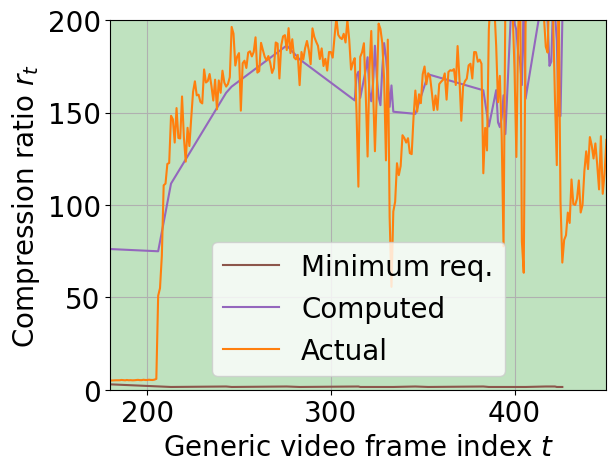

In [16]:
plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(mag_df["frame_id"].to_numpy(),mag_df["target_cmp"].to_numpy(),color="tab:brown", label="Minimum req.")
plt.plot(mag_df["frame_id"].to_numpy(),mag_df["est_cmp"].to_numpy(),color="tab:purple", label="Computed")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["compression_ratio"].to_numpy(),color="tab:orange", label="Actual")
# plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")

plt.ylim([0,200])
plt.legend()
plt.xlim([180,450])
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Compression ratio $r_t$")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

Text(0, 0.5, 'Bandwidth [Mbps]')

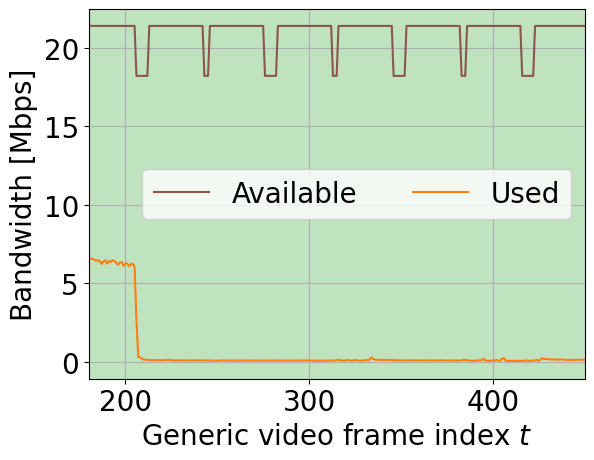

In [17]:
plt.figure()


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:brown",label="Available")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:orange",label="Used")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")
plt.xlim([180,450])
plt.legend(ncol=2)
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Bandwidth [Mbps]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_bandwidth.pdf", bbox_inches='tight')

# SNR

(180.0, 450.0)

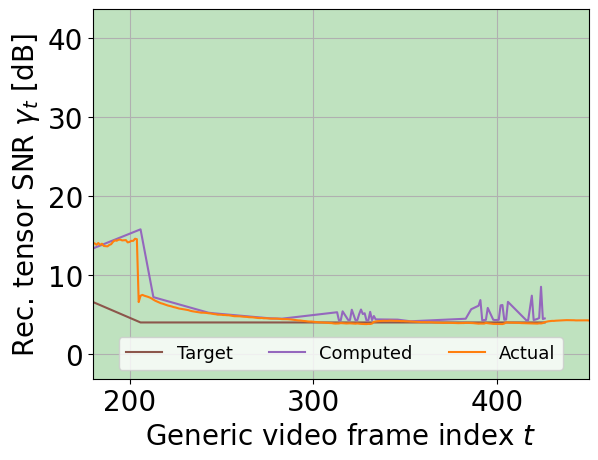

In [18]:
plt.figure()


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(mag_df["frame_id"].to_numpy(),mag_df["target_snr"],color="tab:brown",label="Target")
plt.plot(mag_df["frame_id"].to_numpy(),mag_df["est_snr"],color="tab:purple",label="Computed")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:orange",label="Actual")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

plt.legend( ncol=3,fontsize=13)
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Rec. tensor SNR $\gamma_t$ [dB]")
plt.xlim([180,450])
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')